#Single View Geomerty
##Introduction
The purpose of this homework is to practice single view metrology. Answer the following questions and explain your solution in detail.









## Part1 
For the below image from the NTU Liberal Arts building construction site, shown below, estimate the positions (in the image plane) of the three major vanishing points, corresponding to the building orientations. Use the pre-selected lines to solve for each vanishing point. 



*  Specify there vanishing points(u,v). 
*  Plot the vanishing points and the vanishing lines used to estimate them on the image plane. 
* Plot the ground horizon line and specify its parameters in the form au + bv + c = 0.

Downloading...
From: https://drive.google.com/uc?id=1rXoS2vQBJcwaWy67vkftzrmNYvaqXbBW
To: /content/fengyu.jpg
100% 521k/521k [00:00<00:00, 83.8MB/s]


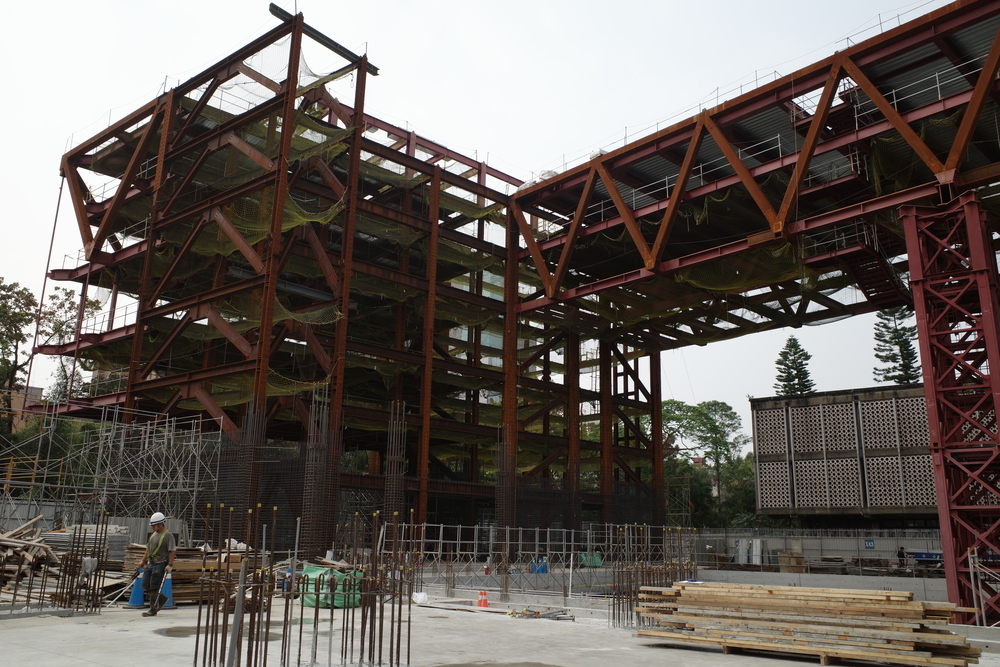

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# download the image
!gdown --id '1rXoS2vQBJcwaWy67vkftzrmNYvaqXbBW' --output fengyu.jpg
filename = 'fengyu.jpg'

# use openCV to read the original image
img = cv2.imread(filename)
cv2_imshow(img)

this block shows the result of line segments plotted on the image, all you need to do here is to download the image and see the result

Downloading...
From: https://drive.google.com/uc?id=18p66e4l-JL_ZWlcyLEvwk6KdgrQzt0eE
To: /content/fengyu_lines.jpg
100% 410k/410k [00:00<00:00, 74.4MB/s]


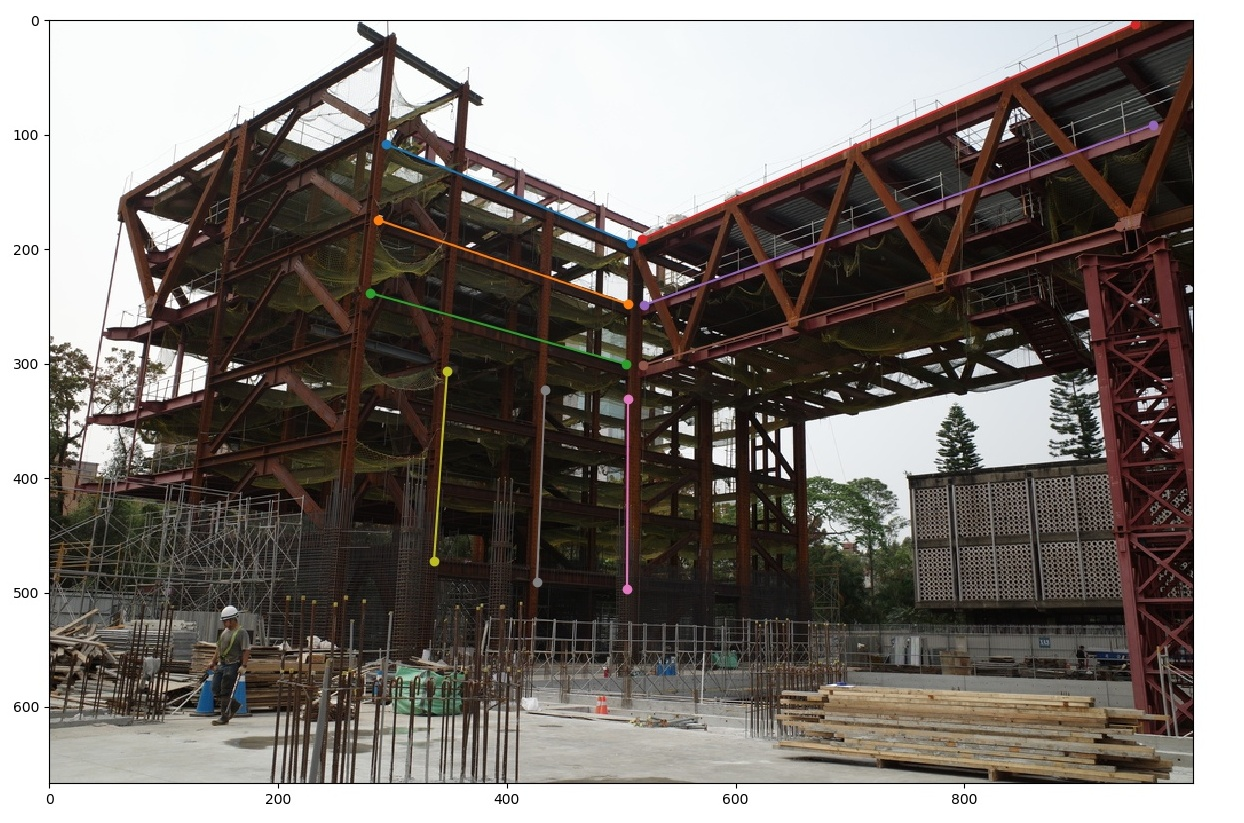

In [2]:
# download the image with line segments on it 
!gdown --id '18p66e4l-JL_ZWlcyLEvwk6KdgrQzt0eE' --output fengyu_lines.jpg

# use openCV to read the image with line segments
lnSegImg = cv2.imread('fengyu_lines.jpg')
cv2_imshow(lnSegImg)

####**step 1: download the segment points of nine line segments shown above and print them out**

In [3]:
# download the segment points of nine line segments 
import json

!gdown --id '1CvZMg3zhm3sdX92ydJhAHOVNPqpfFtff' --output lineSegPts.json
jsonName = 'lineSegPts.json'

Downloading...
From: https://drive.google.com/uc?id=1CvZMg3zhm3sdX92ydJhAHOVNPqpfFtff
To: /content/lineSegPts.json
100% 1.44k/1.44k [00:00<00:00, 899kB/s]


In [4]:
# create a list to store the segment points of nine line segments
cls_pts = []

# read the segment points of line segments from lineSegPts.json
with open(jsonName, 'r') as json_file:
  data = json.load(json_file)
json_file.close()

# append three clusters of line segment points to the cls_pts
for i, cls in enumerate(data):
  cls_pts.append(data[cls])


# print out the content in lineSegPts.json
num_cluster = len(cls_pts)
num_set = len(cls_pts[0])
print(f"There are {num_cluster} clusters.")
print(f"There are {num_set} lines in each clusters.")

###### TODO: complete the ??? part #####
print("\nThree sets of segment points in cluster 1: \n", cls_pts[0])
print("\nThree sets of segment points in cluster 2: \n", cls_pts[1])
print("\nThe start point(a1,b1) and end point(a2,b2) of first line segment in cluster 1: \n", cls_pts[0][0])
print("\nThe start point(a1,b1) and end point(a2,b2) of second line segment in cluster 3: \n", cls_pts[2][1])

There are 3 clusters.
There are 3 lines in each clusters.

Three sets of segment points in cluster 1: 
 [[[294.3813509900795, 107.95841141703897], [508.53601569973927, 194.49437797318717]], [[287.3885456118049, 174.39006251064768], [505.9137136828862, 247.814518982531]], [[280.39574023353026, 238.19941158740346], [504.16551233831757, 300.2605593195905]]]

Three sets of segment points in cluster 2: 
 [[[949.0827545310392, 3.066330742919945], [518.1511230948668, 190.99797528404986]], [[964.816566632157, 91.3504986436368], [519.8993244394355, 248.68861965481528]], [[935.09714377449, 179.63466654435365], [519.0252237671511, 301.13465999187486]]]

The start point(a1,b1) and end point(a2,b2) of first line segment in cluster 1: 
 [[294.3813509900795, 107.95841141703897], [508.53601569973927, 194.49437797318717]]

The start point(a1,b1) and end point(a2,b2) of second line segment in cluster 3: 
 [[426.37055250501265, 490.8145058775734], [433.3633578832873, 322.98717679898294]]


###**step 2: calculate vanishing points based on the pre-calculated line segment points**

In [5]:
import math

# create an empty list for appending vanishing point
list_vp = []

# iterate through each cluster of line segments in order to estimate each vanishing point
for n in range(len(cls_pts)):     
  # create an empty list for adding slope and intercept of three line segments
  lines = []
  for i in range(3): 
    # get the start point (a1,b1) and end point (a2,b2) of the line segment
    # start point (a1,b1)
    a1,b1 = cls_pts[n][i][0][0], cls_pts[n][i][0][1] 
    # end point (a2,b2) 
    a2,b2 = cls_pts[n][i][1][0], cls_pts[n][i][1][1] 

    # determine the x and y interval of line segment
    intv_x = [a1, a2]
    intv_y = [b1, b2]

    # calculate slope and intercept for each line segment
    slope = (b2-b1)/(a2-a1)
    intercept = (b1*a2-b2*a1)/(a2-a1)
    lines.append([slope,intercept]) 

  # find ang1 between the first and second line 
  ang1 = math.degrees(math.atan((lines[0][0] - lines[1][0])/(1+ lines[1][0]*lines[0][0]))) 
  # find ang2 between the second and third line  
  ang2 = math.degrees(math.atan((lines[1][0] - lines[2][0])/(1+ lines[2][0]*lines[1][0]))) 

  # calibrate ang1 and ang2, 
  # if angle is greater than 90 degree, it should be substracted from 180  
  if ang1 > 90:
    ang1 = 180 - ang1
  if ang2 > 90:
    ang2 = 180 - ang2  

  # compare ang1 and ang2
  # the vanish point is determined based on two lines with smaller angle
  if ang1 < ang2:
    x = (lines[0][1] - lines[1][1])/(lines[1][0] - lines[0][0])
    y = lines[1][0]*x + lines[1][1]
    vp = (x, y)
    list_vp.append(vp)
  else:
    x = (lines[1][1] - lines[2][1])/(lines[2][0] - lines[1][0])
    y = lines[2][0]*x + lines[2][1]
    vp = (x, y)
    list_vp.append(vp)	  

# print out three vanishing points corresponds to three clusters
print('The VP coorinate of cluster 1 is: ', list_vp[0])
print('The VP coorinate of cluster 2 is: ', list_vp[1])
print('The VP coorinate of cluster 3 is: ', list_vp[2])

The VP coorinate of cluster 1 is:  (1408.3050710184991, 551.018015047297)
The VP coorinate of cluster 2 is:  (-188.87243881785582, 499.3348227713426)
The VP coorinate of cluster 3 is:  (516.4503127506018, -1671.0997400165616)


###**step 3: plot vanishing points, vanishing lines and ground horizon line on the original image** 

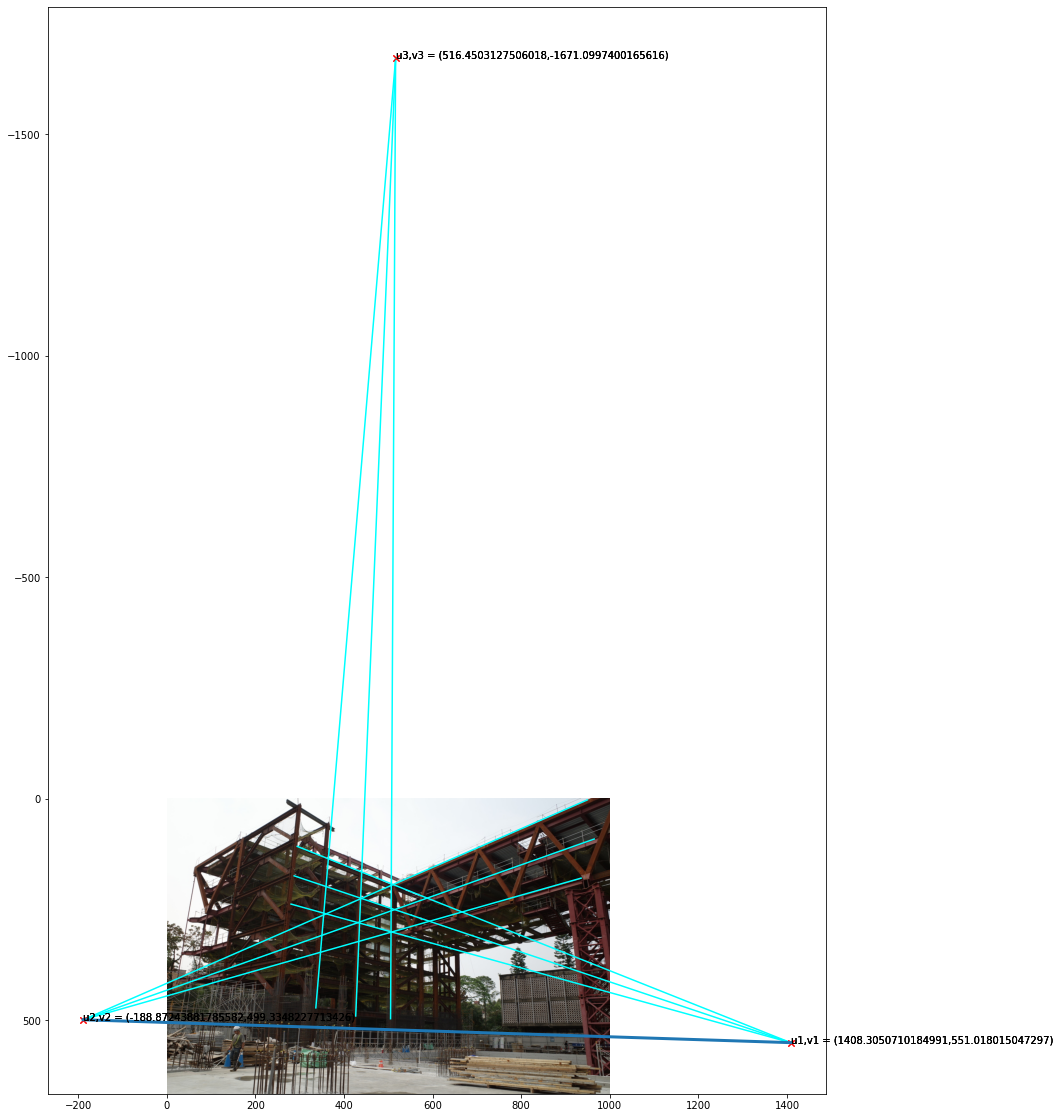

In [6]:
import matplotlib.pyplot as plt
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (25, 20) # this controls figure size in the notebook

# convert bgr to rgb, and show the image via plt.imshow()
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.imshow(im_rgb)

# plot vanishing points and vanishing lines on the original image 
for n in range(len(cls_pts)):
  for i in range(3):

    # determine the x and y interval of ray from start point to vanishing point
    intv_x = [cls_pts[n][i][0][0], list_vp[n][0]]
    intv_y = [cls_pts[n][i][0][1], list_vp[n][1]]
    
    # plot vanishing lines
    plt.plot(intv_x, intv_y, color='cyan') 

    # plot vanishing points
    plt.plot(list_vp[n][0] , list_vp[n][1], marker = 'x', color = "red") 

    # plot each coordinates (u,v) on the original image
    plt.text(list_vp[n][0], list_vp[n][1],'u{0},v{0} = ({1},{2})'.format(n+1,list_vp[n][0],list_vp[n][1]))

# plot horizontal line on the original image 
plt.plot([list_vp[0][0], list_vp[1][0]], [list_vp[0][1], list_vp[1][1]], linewidth = 3)
plt.show()

###**step 4: specify ground horizon line parameters in the form au + bv + c = 0 using two different methods:** 



**method I:**

In [7]:
# calculate the difference x and y between vanishing point 1 and 2 
x1, y1 = list_vp[0]
x2, y2 = list_vp[1]
a, b = (y1 - y2), (x1 - x2)

# calculate the slope of horizon line
slope = a/b
# calculate the intercept of horizon line
intercept = (y1*x2-y2*x1)/(x2-x1)

# the parameters of GHL equation
param = [a, b, intercept*b]

# normalize the parameter of equation
param_norm = [float(i)/sum(param) for i in param]

# print out the result of GHL
print("The equation is:", param_norm[0],"x - ",param_norm[1],"y + ",param_norm[2]," = 0")

The equation is: 6.389027684752728e-05 x -  0.001974415835872525 y +  0.99796169388728  = 0


**method II:**

The ground horizon line that passes through two vanishing points vp1 and vp2 can be also obtained via the cross product:

$$GHL = cross(vp1, vp2)$$


where the 2D vanishing point $(u,v)$ need to be represented in homogeneous coordinates as a 3-vector: 

$$vp = [u,v,1]^{\top}$$

In [8]:
#represent 2D vanishing point in homogeneous coordinates as a 3-vector:
x1, y1 = list_vp[0]
x2, y2 = list_vp[1]
vp1 = [x1, y1, 1] 
vp2 = [x2, y2, 1]

#cross product between two 3-vectors: vp1 and vp2 
param = np.cross(vp1, vp2)

# normalize the parameter of equation
param_norm = [float(i)/sum(param) for i in param]

# print out the result of GHL
print("The equation is:", param_norm[0],"x - ",param_norm[1],"y + ",param_norm[2]," = 0")

The equation is: 6.414356900435043e-05 x -  -0.00198224338131778 y +  1.0019180998123134  = 0


###**step 5: Based on the vanishing points, calculate Camera’s Focal Length and Optical Center:** 

**Hint:** The estimation of focal length and optical center can be realized based on the equation:

$$P_i = KRX_i$$

where $P_i$ is the Vanishing Point $i$, $K$ is the camera’s intrinsic parameters matrix, and $R$ is the Rotation Matrix. 

For vanishing point, understanding that: 

$$X_i^{\top}X_j = 0$$  

According to the equations above, we can conclude that a system of 3 equations with 3 unknowns can be formed using all three calculated vanishing points:


$$p_1^{\top}K^{-\top}K^{-1}p_2 = 0$$
$$p_1^{\top}K^{-\top}K^{-1}p_3 = 0$$
$$p_2^{\top}K^{-\top}K^{-1}p_3 = 0$$


where 
$$
K = \begin{pmatrix}
f & 0 & u_0\\
0 & f & v_0\\
0 & 0 & 1
\end{pmatrix}
$$

where $f$ is the focal length, and $(u_0, v_0)$ is the optical center.

In order to reduce the computational complexity of calculating the 3 equations system, we can sololy estimate focal length $f$ using the equation below:

$$
\begin{aligned}
    x_Q x_R + y_Q y_R + f^2 = 0 \\
    x_Q x_S + y_Q y_S + f^2 = 0 \\
    x_R x_S + y_R y_S + f^2 = 0 
\end{aligned}
$$


More detailed about calculation of focal length and optical center is stated in B. Caprile and V. Torre (1990). “Using Vanishing Points for Camera Calibration.” International Journal of Computer Vision, 4 (2), 127-140. The paper is provided as supplementary document for this assignment

In [9]:
# Estimation of focal length and optical center
from sympy import *
import math

x1, y1 = list_vp[0]
x2, y2 = list_vp[1]
x3, y3 = list_vp[2]
vp1 = Matrix([x1, y1, 1]) 
vp2 = Matrix([x2, y2, 1])
vp3 = Matrix([x3, y3, 1])

# declare 3 sympy variables: f, u0, v0
f, u0, v0 = symbols(['f', 'u0', 'v0']) 


k = Matrix([[f, 0, u0], [0, f, v0], [0, 0, 1]]) 
inv_k = k.inv()  # inverse k
trs_inv_k = inv_k.T  # transpose inverse k 

print("K ={0}".format(k[:]))
print("inverse K ={0} ".format(inv_k[:]))
print("transpose inverse K ={0} \n".format(trs_inv_k[:]))

# 3 equations for solving 3 unkowns: f, u0, v0
eq1 = vp1.T * trs_inv_k * inv_k * vp2
eq2 = vp1.T * trs_inv_k * inv_k * vp3
eq3 = vp2.T * trs_inv_k * inv_k * vp3

# specify the system of 3 equations by Eq()
system = [
    Eq(eq1[0], 0),
    Eq(eq2[0], 0),
    Eq(eq3[0], 0)
]
# use solve() to solve algebraic equations
sol = solve(system, [f, u0, v0])
print("Camera's Focal Length = f = {0}".format(abs(sol[0][0])))
print("Camera's Optical Center = ({0}, {1})".format(sol[0][1], sol[0][2]))

K =[f, 0, u0, 0, f, v0, 0, 0, 1]
inverse K =[1/f, 0, -u0/f, 0, 1/f, -v0/f, 0, 0, 1] 
transpose inverse K =[1/f, 0, 0, 0, 1/f, 0, -u0/f, -v0/f, 1] 

Camera's Focal Length = f = 730.503173746431
Camera's Optical Center = (454.573762836756, 241.085431924556)


##Part2
###Using the height of the worker as a reference, estimate the heights of the steel building, the reinforcing bar and the camera. 

- This can be done with PowerPoint, paper and a ruler, or Python.
- Turn in an illustration that shows the ground horizon, and the lines and measurements used to estimate the heights, as well as the estimated heights. 
- Given the height of worker is 170 centimeters.

Hint: Using **Cross Ratio method** to calculate the actual heights of the required objects

<figure>
<center>
<img src='http://drive.google.com/uc?export=view&id=1z2_UhNN5eEQBXxliE75JcSm4BHofwdUJ' />
<figcaption></figcaption></center>
</figure>